<a href="https://colab.research.google.com/github/JMindpalace/Machine_Learning/blob/main/Example/002.%20Titanic(seaborn).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 문제정의
> 생존

# Read Data-set

In [61]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [53]:
df = sns.load_dataset("titanic")
df.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


# Columns
`Independent Variables:`
- Survied(생존 여부) : 0은 사망, 1은 생존
- pclass(객실 등급) : 1은 1등급, 2면 2등급, 3은 3등급
- sex(성별) : male은 남성, Female은 여성
- age : 나이
- sibsp : 함께 탐승한 형제 혹은 배우자 수
- parch : 함께 탐승한 자녀 혹은 부모님 수
- fare : 요금
- embarked(탑승지) : C는 Cherbourg, Q는 Queenstown, S는 Southampton
- class(객실 등급) : First는 1등급, Second면 2등급, Third는 3등급
- who : 남성, 여성, 아이
- adult_male(성인 남성 여부) : True면 성인 남성, False면 그 외
- deck : 선실 번호 첫 알파벳(A~G)
- embark_town(탑승지 이름) : C는 Cherbourg, Q는 Queenstown, S는 Southampton
- alive(생존 여부) : no는 사망, Yes는 생존
- alone(혼자 탑승 여부): True는 혼자 탑승, False는 가족 동반

`Dependent Variable:`

# 데이터 전처리

In [33]:
# 평균 나이가 더 높은 생존 여부 그룹은? 0(사망)
df.groupby('survived').mean()['age'].round(2)

survived
0    30.63
1    28.34
Name: age, dtype: float64

In [35]:
# 사망자 남성의 좌석등급 중앙값은?(데이터프레임형태로 표시) 3
df.groupby(['survived','sex'], as_index=False)['pclass'].median()

,survived,sex,pclass
0,0,female,3.0
1,0,male,3.0
2,1,female,2.0
3,1,male,2.0


In [63]:
# Young(20세 미만)그룹의 사망자 비율은? 0.52
young, middle, old = df.query('age < 20'), df.query( 'age > 20 & age < 60' ), df.query('age >= 60')
young.survived.value_counts(normalize=True).round(2)

0    0.52
1    0.48
Name: survived, dtype: float64

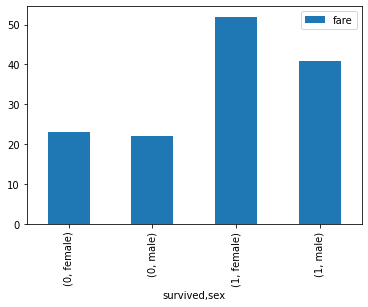

In [64]:
# 생존여부와 성별의 평균요금 Bar plot
df.groupby(['survived','sex'])[['fare']].mean().plot(kind = 'bar');

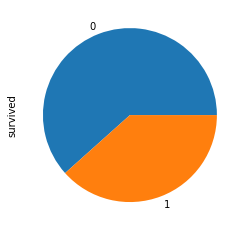

In [39]:
# 생존자 비율을 Pie 그래프
df.survived.value_counts().plot(kind = 'pie');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


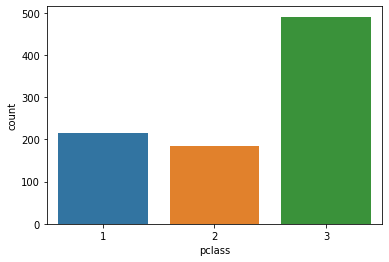

In [46]:
# pclass의 도수 시각화
sns.countplot( df.pclass );

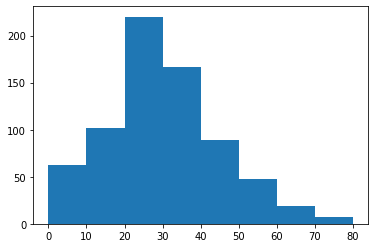

In [65]:
# 나이를 히스토그램으로 표시, bin 개수를 8로 설정
bin_size = 10
bins = np.arange(0, df.age.max()+bin_size, bin_size)

plt.hist( df.age , bins=bins);